<a href="https://colab.research.google.com/github/Dannais/Old-Car-Price-Prediction/blob/main/Old_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importar bibliotecas y Carga de datos

In [2]:
# Importar las bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Cargar el conjunto de datos
filename = '/content/drive/MyDrive/Cursos Data Science/Coding Dojo/2. Machine Learning/0. Fuente de Datos/car_price.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


# **Detalle de la fuente de datos**

**1) Fuente de datos**

Se obtuvo la fuente mediante la plataforma Kaggle.

Fuente: https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

**2) Breve descripción de datos**

La fuente de datos contiene información a detalle de carros antiguos y su precio respectivo.

**3) ¿Cuál es el objetivo?**

* Analizar los datos de investigación.
* Hallar la tendencia de variación del precio promedio por año de manufactura
* Identificar valores atípicos y comparar distribuciones de los precios de los carros entre los 2 tipos de transmisiones
* Definir un modelo de regresión para predecir los precios de los carros.

**4) ¿Este es un problema de clasificación o regresión?**

Es un problema de regresión, ya que necesitamos predecir los precios de los carros antiguos

**5) ¿Cuántas características hay?**

Hay 9 características. 

**6) ¿Cuántas filas de datos hay?**

Hay 5512 filas

**7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?**

Se va a tener que eliminar las medidas estándar de los campos como, por ejemplo, 'kms' del campo kms_driven.


# **Limpieza de Datos**

## Eliminación de las columnas innecesarias

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


## Revisión de existencias de filas duplicadas

In [5]:
df.duplicated().sum()

76

In [6]:
# Eliminación de las filas duplicadas
df = df.drop_duplicates()
df.duplicated().sum()

0

## Identificación de valores faltantes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5436 non-null   object
 1   car_prices_in_rupee  5436 non-null   object
 2   kms_driven           5436 non-null   object
 3   fuel_type            5436 non-null   object
 4   transmission         5436 non-null   object
 5   ownership            5436 non-null   object
 6   manufacture          5436 non-null   int64 
 7   engine               5436 non-null   object
 8   Seats                5436 non-null   object
dtypes: int64(1), object(8)
memory usage: 424.7+ KB


> No hay datos faltantes en la fuente de datos para ningún campo

## Identificación y corrección de las inconsistencias en los datos para los valores categóricos

In [8]:
# Revisión del campo 'transmission'
df['transmission'].value_counts()

Manual       3919
Automatic    1517
Name: transmission, dtype: int64

In [9]:
# Revisión del campo 'fuel_type'
df['fuel_type'].value_counts()

Petrol      2933
Diesel      2381
Cng           80
Lpg           28
Electric      14
Name: fuel_type, dtype: int64

In [10]:
# Revisión del campo 'ownership'
df['ownership'].value_counts()

1st Owner    3678
2nd Owner    1298
3rd Owner     358
4th Owner      84
5th Owner      12
0th Owner       6
Name: ownership, dtype: int64

In [11]:
# Revisión del campo 'Seats'
df['Seats'].value_counts()

5 Seats    4603
7 Seats     626
4 Seats      88
6 Seats      60
8 Seats      54
2 Seats       5
Name: Seats, dtype: int64

> Los campos categóricos de la fuente no necesitan ser corregidos, ya que ninguno presenta inconsistencias en la data

## Corrección de tipo de Datos


In [12]:
# Cambiar el tipo de datos de 'kms_driven' a númerico
df['kms_driven']=df['kms_driven'].str.replace('kms','')
df['kms_driven']=df['kms_driven'].str.replace(',','')
df['kms_driven'] = df['kms_driven'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5436 non-null   object
 1   car_prices_in_rupee  5436 non-null   object
 2   kms_driven           5436 non-null   int64 
 3   fuel_type            5436 non-null   object
 4   transmission         5436 non-null   object
 5   ownership            5436 non-null   object
 6   manufacture          5436 non-null   int64 
 7   engine               5436 non-null   object
 8   Seats                5436 non-null   object
dtypes: int64(2), object(7)
memory usage: 424.7+ KB


<ipython-input-12-76df752b5044>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']=df['kms_driven'].str.replace('kms','')
<ipython-input-12-76df752b5044>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']=df['kms_driven'].str.replace(',','')
<ipython-input-12-76df752b5044>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [13]:
# Cambiar el tipo de datos de 'engine' a númerico
df['engine']=df['engine'].str.replace('cc','')
df['engine'] = df['engine'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5436 non-null   object
 1   car_prices_in_rupee  5436 non-null   object
 2   kms_driven           5436 non-null   int64 
 3   fuel_type            5436 non-null   object
 4   transmission         5436 non-null   object
 5   ownership            5436 non-null   object
 6   manufacture          5436 non-null   int64 
 7   engine               5436 non-null   int64 
 8   Seats                5436 non-null   object
dtypes: int64(3), object(6)
memory usage: 424.7+ KB


<ipython-input-13-12720517edd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine']=df['engine'].str.replace('cc','')
<ipython-input-13-12720517edd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine'] = df['engine'].astype(int)


In [14]:
# Cambiar el tipo de datos de 'ownership' a númerico
df['ownership']=df['ownership'].str.replace('Owner','')
df['ownership']=df['ownership'].str.replace('st','')
df['ownership']=df['ownership'].str.replace('nd','')
df['ownership']=df['ownership'].str.replace('rd','')
df['ownership']=df['ownership'].str.replace('th','')
df['ownership'] = df['ownership'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5436 non-null   object
 1   car_prices_in_rupee  5436 non-null   object
 2   kms_driven           5436 non-null   int64 
 3   fuel_type            5436 non-null   object
 4   transmission         5436 non-null   object
 5   ownership            5436 non-null   int64 
 6   manufacture          5436 non-null   int64 
 7   engine               5436 non-null   int64 
 8   Seats                5436 non-null   object
dtypes: int64(4), object(5)
memory usage: 424.7+ KB


In [15]:
# Cambiar el tipo de datos de 'car_prices_in_rupee' a númerico

## Separar campos por el valor del precios y la moneda
car_prices_in_rupee = df["car_prices_in_rupee"].str.split(expand=True)
car_prices_in_rupee.columns = ['price', 'moneda']

## Añadir estos campos al df
df = pd.concat([car_prices_in_rupee, df], axis=1)

## Reemplazar los valores nulos de la columna 'moneda' con 'Rupee'
df['moneda'].fillna('Rupee',inplace = True)

## Reemplazar caracteres
df['price'] = df['price'].str.replace(',','')

## Cambiar el tipo de datos del campo 'price'
df['price'] = df['price'].astype(float)

df.head()

,price,moneda,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,10.03,Lakh,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,86226,Diesel,Manual,1,2017,1956,5 Seats
1,12.83,Lakh,Renault Duster RXZ Turbo CVT,12.83 Lakh,13248,Petrol,Automatic,1,2021,1330,5 Seats
2,16.40,Lakh,Toyota Camry 2.5 G,16.40 Lakh,60343,Petrol,Automatic,1,2016,2494,5 Seats
3,7.77,Lakh,Honda Jazz VX CVT,7.77 Lakh,26696,Petrol,Automatic,1,2018,1199,5 Seats
4,5.15,Lakh,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,69414,Petrol,Manual,1,2016,1199,5 Seats


In [16]:
## Revisión de los datos en el campo 'Moneda'
df['moneda'].value_counts()

Lakh     5258
Rupee     123
Crore      55
Name: moneda, dtype: int64

In [17]:
## Crear variables para la conversion
## Conversiones
moneda = [
    (df['moneda']=='Lakh'),
    (df['moneda']=='Rupee'),
    (df['moneda']=='Crore')
]
Conversiones =[100000,1,10000000]

## Crear una nueva columna de las conversiones por tipo de moneda
df['Conversion'] = np.select(moneda, Conversiones)
df['Conversion'].value_counts()

100000      5258
1            123
10000000      55
Name: Conversion, dtype: int64

In [18]:
## Multiplicación del campo 'price' y su respectiva conversion por moneda
df['car_prices_in_rupee'] = df['price'] * df['Conversion']
df.head()

,price,moneda,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Conversion
0,10.03,Lakh,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1,2017,1956,5 Seats,100000
1,12.83,Lakh,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1,2021,1330,5 Seats,100000
2,16.40,Lakh,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1,2016,2494,5 Seats,100000
3,7.77,Lakh,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1,2018,1199,5 Seats,100000
4,5.15,Lakh,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1,2016,1199,5 Seats,100000


In [19]:
## Eliminar campos creados innecesarios
df = df.drop(columns=['price','moneda','Conversion'])
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1,2017,1956,5 Seats
1,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1,2021,1330,5 Seats
2,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1,2016,2494,5 Seats
3,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1,2018,1199,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1,2016,1199,5 Seats


In [20]:
# Cambiar el tipo de datos de 'Seats' a númerico
df['Seats']=df['Seats'].str.replace('Seats','')
df['Seats'] = df['Seats'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5436 non-null   object 
 1   car_prices_in_rupee  5436 non-null   float64
 2   kms_driven           5436 non-null   int64  
 3   fuel_type            5436 non-null   object 
 4   transmission         5436 non-null   object 
 5   ownership            5436 non-null   int64  
 6   manufacture          5436 non-null   int64  
 7   engine               5436 non-null   int64  
 8   Seats                5436 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 424.7+ KB


In [21]:
# Añadir campo de marca de carro
df_brand = df["car_name"].str.split(" ",n=1,expand=True)
df_brand.columns = ['Brand', 'only_car_name']

# Añadir estos campos al df
df = pd.concat([df_brand, df], axis=1)

## Eliminar campos car_name 
df = df.drop(columns=['car_name'])
df.head()

,Brand,only_car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1,2017,1956,5
1,Renault,Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1,2021,1330,5
2,Toyota,Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1,2016,2494,5
3,Honda,Jazz VX CVT,777000.0,26696,Petrol,Automatic,1,2018,1199,5
4,Volkswagen,Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1,2016,1199,5


# **Exploración de datos**

Producir visuales univariantes para el objetivo y todas las características

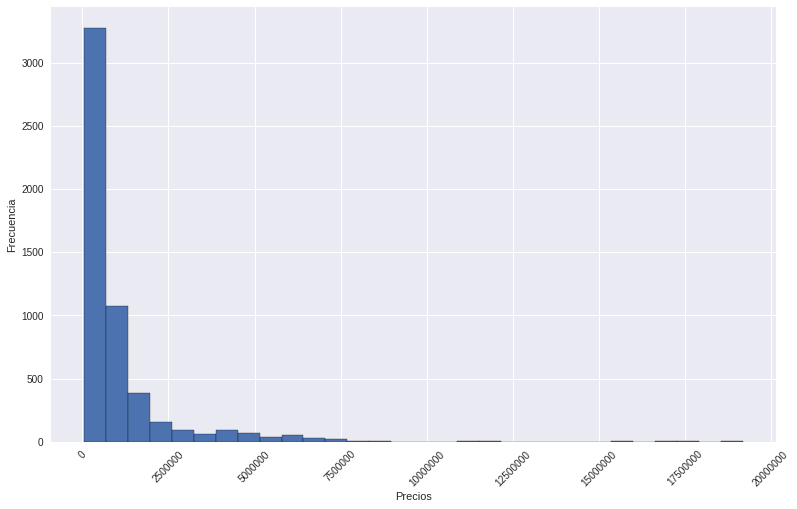

In [22]:
# Histograma de precios
plt.style.use('seaborn')
plt.figure(figsize=[13,8])
df['car_prices_in_rupee'].hist(bins = 30,
                               edgecolor = 'black')

plt.ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Frecuencia')
plt.xlabel('Precios')
plt.xticks(rotation = 45)
plt.show()

>Podemos observar que la mayor cantidad de datos de los precios de autos antiguos son menores que 2,500,000 rupias.

Tendencia del precio promedio por año manufacturado

In [23]:
# Precio promedio por año manufacturado
price_manufactureYear = df.groupby(['manufacture'])['car_prices_in_rupee'].mean()
price_manufactureYear

manufacture
1995    2.600000e+05
1998    8.500000e+04
1999    3.500000e+04
2000    4.725000e+04
2001    1.275000e+05
2002    1.303077e+05
2003    9.467162e+04
2004    1.600000e+05
2005    1.472335e+05
2006    1.793266e+05
2007    2.065699e+05
2008    1.600935e+05
2009    1.990563e+05
2010    2.764685e+05
2011    3.737840e+05
2012    4.172893e+05
2013    5.933659e+05
2014    6.914497e+05
2015    8.099363e+05
2016    9.599041e+05
2017    1.180891e+06
2018    1.452321e+06
2019    2.210981e+06
2020    2.295810e+06
2021    2.378293e+06
2022    2.608803e+06
Name: car_prices_in_rupee, dtype: float64

In [24]:
manufactureYears = list(price_manufactureYear.index)
manufactureYears

[1995,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [25]:
price_prom = list(price_manufactureYear.values)
price_prom

[260000.0,
 85000.0,
 35000.0,
 47250.0,
 127500.0,
 130307.69230769231,
 94671.625,
 160000.0,
 147233.4642857143,
 179326.61904761905,
 206569.93333333332,
 160093.45132743364,
 199056.3409090909,
 276468.50230414746,
 373783.9612403101,
 417289.2976588629,
 593365.8505434783,
 691449.6783369803,
 809936.3141762452,
 959904.1394335512,
 1180891.4473684211,
 1452321.083172147,
 2210981.4814814813,
 2295810.495626822,
 2378292.899408284,
 2608802.8169014086]

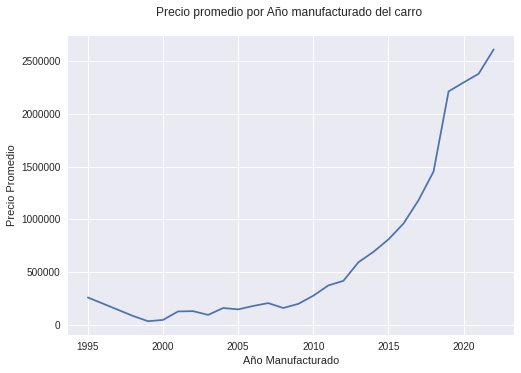

In [26]:
plt.style.use('seaborn')
plt.plot(manufactureYears, price_prom)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Año Manufacturado')
plt.ylabel('Precio Promedio')
plt.title('Precio promedio por Año manufacturado del carro \n')
plt.show()

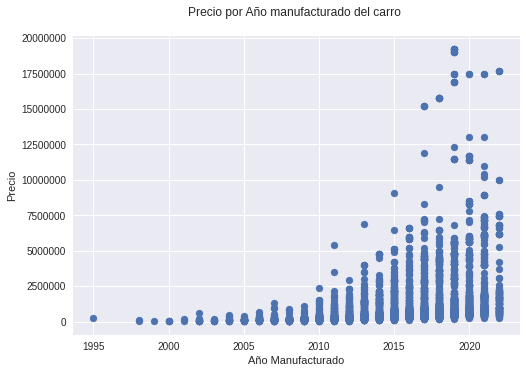

In [27]:
plt.style.use('seaborn')
plt.scatter(df['manufacture'], df['car_prices_in_rupee'], cmap='viridis')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Año Manufacturado')
plt.ylabel('Precio')
plt.title('Precio por Año manufacturado del carro \n')
plt.show()

> Hay una tendencia incremental del promedio del precio de los autos. Mientras más nuevo sea el carro mantiene un mayor precio que el resto 

Revisión de Outliers

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


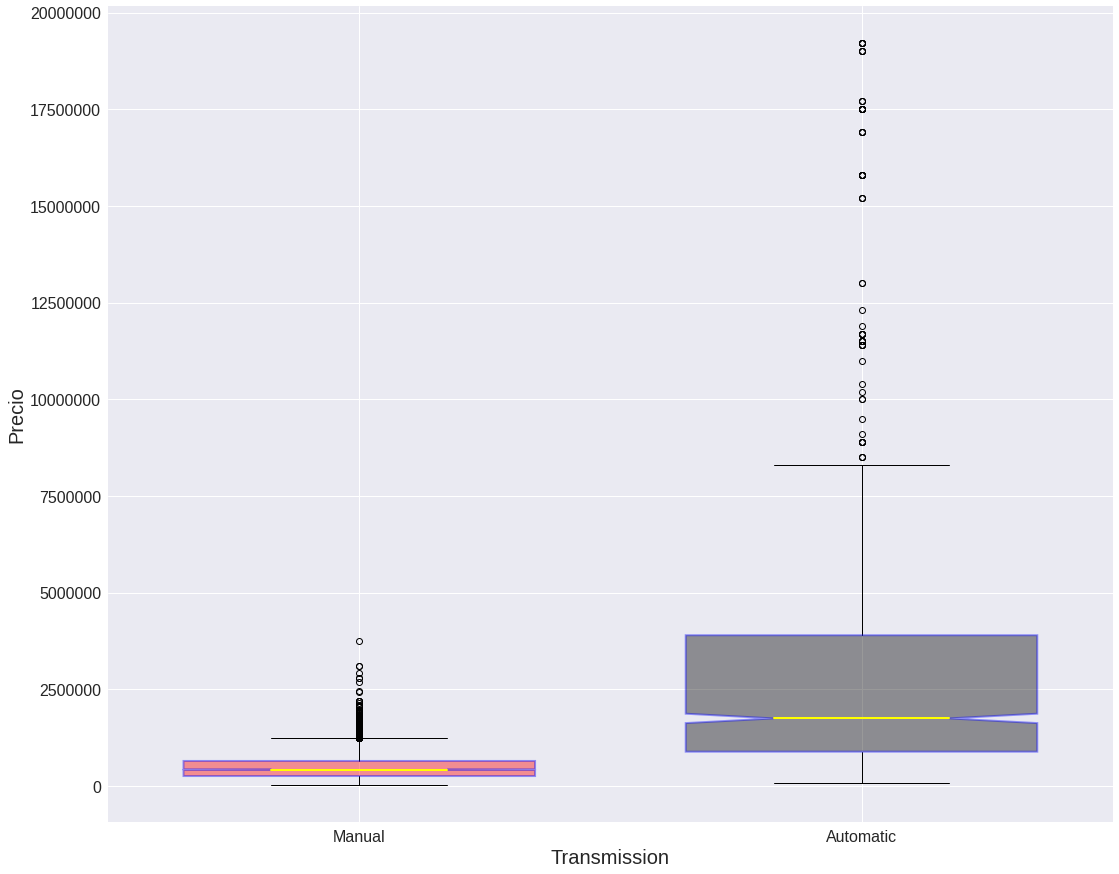

In [28]:
malignant = df.loc[df['transmission']=='Manual','car_prices_in_rupee']
benign = df.loc[df['transmission']=='Automatic','car_prices_in_rupee']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,15))
axes.ticklabel_format(useOffset=False, style='plain')
boxplots = axes.boxplot([malignant,benign],
           notch = True,
           labels=['Manual', 'Automatic'],
           widths = .7, 
           patch_artist=True, 
           medianprops = dict(linestyle='-',
                              linewidth=2, 
                              color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='blue', facecolor = 'black', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Transmission', fontsize = 20)
plt.ylabel('Precio', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

> De acuerdo con la gráfica, tenemos varios precios por encima de la gráfica como datos átipicos, es decir, que son precios muy elevados frente a la mayoría de datos

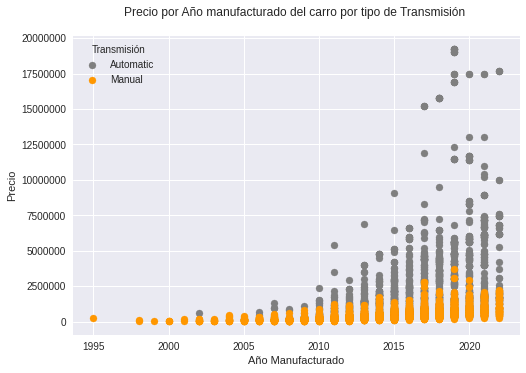

In [29]:
plt.style.use('seaborn')
plt.scatter((df[df['transmission']=='Automatic'])['manufacture'], (df[df['transmission']=='Automatic'])['car_prices_in_rupee'], c='#7f7f7f', label ='Automatic')
plt.scatter((df[df['transmission']=='Manual'])['manufacture'], (df[df['transmission']=='Manual'])['car_prices_in_rupee'], c='#ff9700', label ='Manual')

plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(title="Transmisión")
plt.xlabel('Año Manufacturado')
plt.ylabel('Precio')
plt.title('Precio por Año manufacturado del carro por tipo de Transmisión \n')
plt.show()

# **Preprocesamiento de Data**

In [30]:
# Manejo de variables categóricas
df_clean = pd.get_dummies(df,drop_first=True)
df_clean.head()

,car_prices_in_rupee,kms_driven,ownership,manufacture,engine,Seats,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,...,only_car_name_i20 Sportz Plus,only_car_name_i20 Sportz Plus BSIV,only_car_name_i20 Sportz Plus CVT BSIV,only_car_name_i20 Sportz Plus Diesel,only_car_name_prado VX A/T,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,fuel_type_Petrol,transmission_Manual
0,1003000.0,86226,1,2017,1956,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1283000.0,13248,1,2021,1330,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1640000.0,60343,1,2016,2494,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,777000.0,26696,1,2018,1199,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,515000.0,69414,1,2016,1199,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


# **Modelamiento de datos**

Para evaluar el redimiento del modelos se va a incluir en un dataframe denominado 'frame' con todos los resultados para un mejor análisis. 

In [65]:
# Dataframe de comparación de las métricas de todos los modelos
frames = []

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Columns: 1937 entries, car_prices_in_rupee to transmission_Manual
dtypes: float64(1), int64(5), uint8(1931)
memory usage: 10.3 MB


## Regresión Lineal

### Modelamos

In [33]:
# Asignar el objetivo (y) y las características (X)
y = df_clean['car_prices_in_rupee']
X =df_clean.drop(columns = 'car_prices_in_rupee')

# Realizar un train test split a los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Instanciar el modelo
reglineal = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
reglineal.fit(X_train,y_train)

LinearRegression()

### Predicción del modelo

In [34]:
# Obtengan las predicciones del conjunto de entrenamiento
reglineal_train_preds = reglineal.predict(X_train)

# Obtengan las predicciones del conjunto de prueba
reglineal_test_preds = reglineal.predict(X_test)

### Rendimiento del modelo

La métrica por defecto para evaluar el modelo de regresión es R^2, el coeficiente de determinación.

In [35]:
print('Model LinearRegression')

# Coeficiente de determinación (R^2)
reglineal_r2_train = r2_score(y_train, reglineal_train_preds)
reglineal_r2_test = r2_score(y_test, reglineal_test_preds)
print('Train R^2:', reglineal_r2_train)
print('Test R^2:', reglineal_r2_test)

Model LinearRegression
Train R^2: 0.9864932207636903
Test R^2: 0.9306270268018519


In [66]:
# Colocamos los resultados del modelo LinearRegression en un df 
df_metricas_reglineal = pd.DataFrame({
                        'r2 train'  : [reglineal_r2_train],
                        'r2 test'    : [reglineal_r2_test],
                        'model'     : ['LinearRegression']
                     })

# Agregar el df del modelo al frame de comparación
frames.append(df_metricas_reglineal)

# Revisar el Dataframe de comparación
pd.concat(frames)

,r2 train,r2 test,model
0,0.986493,0.930627,LinearRegression


## Árbol de decisión

### Modelamos

In [37]:
# Asignar el objetivo (y) y las características (X)
y = df_clean['car_prices_in_rupee']
X =df_clean.drop(columns = 'car_prices_in_rupee')

# Realizar un train test split a los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Instanciar el modelo
dec_tree = DecisionTreeRegressor(random_state = 42)

# Entrenar el modelo con los datos de entrenamiento
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Predicción del modelo

In [38]:
# Obtengan las predicciones del conjunto de entrenamiento
tree_train_preds = dec_tree.predict(X_train)

# Obtengan las predicciones del conjunto de prueba
tree_test_preds = dec_tree.predict(X_test)

### Rendimiento del modelo

In [39]:
print('Model DecisionTreeRegressor')

# Coeficiente de determinación (R^2)
dec_tree_r2_train = r2_score(y_train, tree_train_preds)
dec_tree_r2_test = r2_score(y_test, tree_test_preds)
print('Train R^2:', dec_tree_r2_train)
print('Test R^2:', dec_tree_r2_test)

Model DecisionTreeRegressor
Train R^2: 0.9999999819720891
Test R^2: 0.926077796701343


### Ajustar el modelo

In [40]:
# ¿Cuál era la profundidad de nuestro árbol por defecto?
dec_tree.get_depth()

67

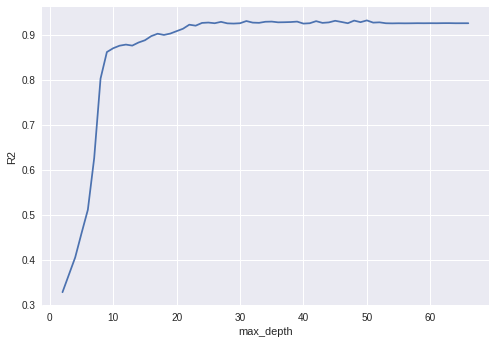

In [61]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 67))

# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

# Visualizamos qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [64]:
# Ejecutemos el modelo con nuestro valor optimizado para max_depth
dec_tree_31 = DecisionTreeRegressor(max_depth = 31
                                    , random_state = 42)
dec_tree_31.fit(X_train, y_train)

# Predicciones
tree_train_preds_31 = dec_tree_31.predict(X_train)
tree_test_preds_31 = dec_tree_31.predict(X_test)

tree_r2_train_31 = r2_score(y_train, tree_train_preds_31)
tree_r2_test_31 = r2_score(y_test, tree_test_preds_31)
print(tree_r2_train_31)
print(tree_r2_test_31)

0.9984055358510421
0.9308883410384601


In [67]:
# Colocamos los resultados del modelo DecisionTreeRegressor en un df 
df_metricas_dectree =   pd.DataFrame({
                        'r2 train'  : [tree_r2_train_31],
                        'r2 test'    : [tree_r2_test_31],
                        'model'     : ['DecisionTreeRegressor']
                     })

# Agregar el df del modelo al frame de comparación
frames.append(df_metricas_dectree)

# Revisar el Dataframe de comparación
pd.concat(frames)

,r2 train,r2 test,model
0,0.986493,0.930627,LinearRegression
0,0.998406,0.930888,DecisionTreeRegressor


## Bagged Trees

### Modelamos

In [44]:
# Asignar el objetivo (y) y las características (X)
y = df_clean['car_prices_in_rupee']
X =df_clean.drop(columns = 'car_prices_in_rupee')

# Realizar un train test split a los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Instanciar el modelo
bagreg = BaggingRegressor(random_state = 42)

# Entrenar el modelo con los datos de entrenamiento
bagreg.fit(X_train,y_train)

BaggingRegressor(random_state=42)

### Predicción del modelo

In [45]:
# Obtengan las predicciones del conjunto de entrenamiento
bagreg_train_preds = bagreg.predict(X_train)

# Obtengan las predicciones del conjunto de prueba
bagreg_test_preds = bagreg.predict(X_test)

### Rendimiento del modelo

In [46]:
print('Model BaggingRegressor')

# Coeficiente de determinación (R^2)
bagreg_r2_train = r2_score(y_train, bagreg_train_preds)
bagreg_r2_test = r2_score(y_test, bagreg_test_preds)
print('Train R^2:', bagreg_r2_train)
print('Test R^2:', bagreg_r2_test)

Model BaggingRegressor
Train R^2: 0.9696830528805146
Test R^2: 0.8512890359700066


In [47]:
# Miren a los hiperparámetros
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [48]:
# Intenten 100  estimadores
bagreg_100 = BaggingRegressor(n_estimators = 100, random_state = 42)

# Ajusten el modelo
bagreg_100.fit(X_train, y_train)

# Obtengan las puntuaciones
bagreg_100_train_score = bagreg_100.score(X_train, y_train)
bagreg_100_test_score = bagreg_100.score(X_test, y_test)
print(bagreg_100_train_score)
print(bagreg_100_test_score)

0.9825201893265848
0.892843690887742


Al probar con 100 estimadores para el modelo de Bagged Trees tenemos que ha mejorado el modelo para ambas fuentes, la de entrenamiento y la de prueba, asi que vamos a usar esa nueva configuración

In [68]:
# Colocamos los resultados del modelo DecisionTreeRegressor en un df 
df_metricas_bagreg =   pd.DataFrame({
                        'r2 train'  : [bagreg_100_train_score],
                        'r2 test'    : [bagreg_100_test_score],
                        'model'     : ['BaggingRegressor']
                     })

# Agregar el df del modelo al frame de comparación
frames.append(df_metricas_bagreg)

# Revisar el Dataframe de comparación
pd.concat(frames)

,r2 train,r2 test,model
0,0.986493,0.930627,LinearRegression
0,0.998406,0.930888,DecisionTreeRegressor
0,0.982520,0.892844,BaggingRegressor


## Bosques Aleatorios

### Modelamos

In [50]:
# Asignar el objetivo (y) y las características (X)
y = df_clean['car_prices_in_rupee']
X =df_clean.drop(columns = 'car_prices_in_rupee')

# Realizar un train test split a los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Instanciar el modelo
rf = RandomForestRegressor(random_state = 42)

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

### Rendimiento del modelo

In [51]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9825972532099445
0.8944584478744328


### Ajustar el modelo

In [52]:
# Revisando algunos hiperparámetros que parecen ajustables
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [53]:
# Intenten 200 árboles
rf_200 = RandomForestRegressor(n_estimators = 300, random_state = 42)

# Ajusten el modelo
rf_200.fit(X_train, y_train)

# Obtengan las puntuaciones
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9837396486099244
0.89017262221949


Al ejecutar con 300 estimadores incrementa el score de la data de entrentamiento, pero el score de la data de prueba baja, por ende nos quedaremos con la hiperparámetros predeterminados

In [69]:
# Colocamos los resultados del modelo RandomForestRegressor en un df 
df_metricas_rf =   pd.DataFrame({
                        'r2 train'  : [rf_train_score],
                        'r2 test'    : [rf_test_score],
                        'model'     : ['RandomForestRegressor']
                     })

# Agregar el df del modelo al frame de comparación
frames.append(df_metricas_rf)

# Revisar el Dataframe de comparación
pd.concat(frames)

,r2 train,r2 test,model
0,0.986493,0.930627,LinearRegression
0,0.998406,0.930888,DecisionTreeRegressor
0,0.982520,0.892844,BaggingRegressor
0,0.982597,0.894458,RandomForestRegressor


# **Modelo Seleccionado**

Después de haber realizado un análisis y un desarrollo de los modelos se puede deducir que el modelo con mejor rendimiento para la predicción de los precios es el modelo de Árbol de decisión, ya que manejan scores parecidos tanto en la data de entrenamiento y de prueba, y ambos están más cercanos al 1, es decir, es el modelo más ajustado frente a los otros.